# ML을 하기 위해 해야하는 것들
- 데이터 나누기 : Train, Validation, Test
- 데이터 전처리하기
  - 탐색적 자료 분석 (EDA)
  - 피쳐 엔지니어링

## 데이터 모판
- Train과 Test를 하나의 판으로 만들어 핸들링하는 것
- Train과 Test 데이터는 동일한 전처리 적용
- 데이터에 따라 Train에만 있고 Test에는 존재하지 않는 경우 -> 초기 데이터 전처리시 규칙을 만들어야 함
- 실제 서비스에서는 모델 생성시 사용한 전처리를 그대로 활용

# 데이터 전처리

## 데이터 모판 만들기

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(style='white')
sns.set(style='whitegrid', color_codes = True)

In [ ]:
DATA_DIR = "titanic/"
os.listdir(DATA_DIR)

In [5]:
# os.listdir(DATA_DIR) 안 파일 순서를 바꿔준다 (train -> test)
data_files = reversed([os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)])
df_list = []

for filename in data_files:
  df_list.append(pd.read_csv(filename))

# df_list : pd.read_csv로 불러온 파일들을 데이터프레임으로 첨부
df_list

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [6]:
df = pd.concat(df_list, sort = False)
# 데이터를 그냥 붙여주어 중복되는 인덱스가 생김!
df = df.reset_index(drop = True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
number_of_train_dataset = df.Survived.notnull().sum() # null이 아닌 경우, 답이 존재하는 것 -> train
number_of_test_dataset = df.Survived.isnull().sum() # null인 경우, 답이 존재하지 않는 것 -> test
y_true = df.pop('Survived')[:number_of_train_dataset] # number_of_train_dataset까지 Survived만 pop해서 추출

df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Data Preprocessing

## 데이터 처리의 전략
- 모판은 흔들지 않는다
- 하나의 셀을 다시 실행해도 그 결과가 보장되야 한다
- 전처리가 완료 후, 함수화한다 (merge 함수 필수)
- 컬럼 이름은 list로 관리하기 (직접 입력 X)
- 데이터는 타입별로 분리해서 관리
- 데이터 노트 작성하기
  - 데이터 컬럼이 많아지게 될 경우, 컬럼이 각 어떤 의미, 의도인지 노트를 작성하여 관리하는 것이 좋다.

## 데이터 노트
- 데이터에 대한 처리 내용 및 방향을 정리한 노트
- 기본적인 전처리 방향과 방법들을 정리함
- 데이터에 대한 아이디어를 정리와 지속적으로 업데이트
- 기본적인 정보를 적고, 이를 어떻게 처리할 것인지 살펴본다


기본적인 데이터 현황 파악 코드


```
df.dtypes
df.info()
df.isnull().sum() # 데이터가 얼마나 비어있는지 확인
df.describe()
df.head(2).T
```



In [60]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [62]:
df.isnull().sum() #해당 결측치들에 대한 이유들, 해결 방법들 생각해보는 것

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [63]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [64]:
df.head(2).T

,0,1
PassengerId,1,2
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833
Cabin,NaN,C85


# Data Cleaning issues
- 데이터가 빠진 경우 (결측치의 처리)
- 라벨링된 데이터 (category) 데이터의 처리
- 데이터의 scale의 차이가 매우 크게 날 경우

## Missing Value Strategy
- 데이터가 없으면 sample drop
  - 데이터가 없는 최소 개수를 정해서 sample drop
  - 데이터가 거의 없는 feature는 feature 자체를 drop
- 최빈값, 평균값으로 비어있는 데이터를 채우기

In [65]:
import pandas as pd
import numpy as np

In [66]:
raw_data = {
    'first_name' : ['Jason', np.nan, 'Tina', 'Jake', 'Any'],
    'last_name' : ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
    'age' : [42, np.nan, 36, 24, 73],
    'sex' : ['m', np.nan, 'f', 'm', 'f'],
    'preTestScore' : [4, np.nan, np.nan, 2, 3],
    'postTestScore' : [25, np.nan, np.nan, 62, 70]
}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [67]:
df.isnull().sum() # 결측치가 얼마나 존재하는지 확인

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [68]:
df.dropna() # drop이 하나라도 있을 경우, 행 전체를 드랍

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [69]:
df.dropna(thresh=4) # NaN이 4개 이상 있는 경우에만 drop

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [70]:
df.dropna(how='all') # 전체가 없는 경우에 드랍

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [71]:
df.dropna(how='any') # nan이 하나라도 있는 경우 드랍

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [72]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Any,Cooze,73.0,f,3.0,70.0,NaN


In [73]:
 df.dropna(axis=1, how='all') # 열을 기준으로 drop

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


만약 너무 많은 데이터가 비어있는 경우, drop을 시키는 게 맞다!

### 데이터 값 채우기
- 평균값, 중위값, 최빈값 활용
- 정규분포에 가까운 경우라면 평균값으로 채워주는 것이 좋겠지만, 한쪽으로 몰려져있을 경우 최빈값으로 채우는 것이 좋음!

In [74]:
df.fillna(0) # 모든 nan을 0으로 채운다

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Any,Cooze,73.0,f,3.0,70.0,0.0


In [75]:
cleansd_df = df.dropna(axis=1, how='all')
cleansd_df = cleansd_df.dropna(axis=0, how='all')
cleansd_df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Any,Cooze,73.0,f,3.0,70.0


In [76]:
df['preTestScore'].mean()

3.0

In [77]:
df['postTestScore'].median()

62.0

In [78]:
df['postTestScore'].mode()

0    25.0
1    62.0
2    70.0
Name: postTestScore, dtype: float64

In [79]:
df['preTestScore'].fillna(df['preTestScore'].mean()) # 평균값으로 결측치를 채워준다

0    4.0
1    3.0
2    3.0
3    2.0
4    3.0
Name: preTestScore, dtype: float64

In [80]:
cleansd_df.groupby('sex')['postTestScore'].mean() # 성별에 따라 구분지어 확인

sex
f    70.0
m    43.5
Name: postTestScore, dtype: float64

In [81]:
cleansd_df.groupby('sex')['postTestScore'].transform('mean') # 각 항목별로 성별에 따른 평균값을 넣는다

0    43.5
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [82]:
cleansd_df['postTestScore'].fillna(cleansd_df.groupby('sex')['postTestScore'].transform('mean')) # 결측치만 성별에 따른 평균값으로 채운다

0    25.0
2    70.0
3    62.0
4    70.0
Name: postTestScore, dtype: float64

### 타이타닉 데이터

In [83]:
df.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
location         5
dtype: int64

In [84]:
df[df['Age'].notnull()].groupby(['Sex'])['Age'].mean() # notnull인 경우에서 성별에 따른 나이 평균값

KeyError: 'Age'

구간을 나누어서 정규분포로 놓고 비교하는 것이 가장 좋다!

In [ ]:
df[df['Age'].notnull()].groupby(['Pclass'])['Age'].mean() # 자리 등급에 따른 성별

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [ ]:
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace = True)
df.isnull().sum() # Age 결측치 모두 채워진 것 확인!

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## category value

### 이산형 데이터를 어떻게 처리할까?
- one-hot encoding

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
edges = pd.DataFrame({'source': [0, 1, 2],
                      'target':[2, 2, 3], 
                      'weight' : [3, 4, 5], 
                      'color':['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [ ]:
pd.get_dummies(edges) # 색상 원핫인코딩

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [ ]:
pd.concat([edges, pd.get_dummies(edges['color'])], axis=1) # 원래 있던 color명에 추가

,source,target,weight,color,blue,red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [ ]:
pd.concat([edges, pd.get_dummies(edges[['color']])], axis=1) # 원핫인코딩 결과 앞에 color_를 붙여 표시되게끔 함

,source,target,weight,color,color_blue,color_red
0,0,2,3,red,0,1
1,1,2,4,blue,1,0
2,2,3,5,blue,1,0


In [ ]:
weight_dict = {3:'M', 4:'L', 5:'XL'}
edges['weight_sign'] = edges['weight'].map(weight_dict)
edges # 숫자가 아닌 범주형 데이터로 변경하여 표시

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [ ]:
weight_sign = pd.get_dummies(edges[['weight_sign']])
weight_sign

,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,1,0
1,1,0,0
2,0,0,1


In [ ]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,weight_sign_L,weight_sign_M,weight_sign_XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


### 데이터 구간 나누기
- 데이터 그대로 보는 것이 아닌 데이터의 구간을 나누어서 본다!
- Data : 0, 4, 12, 16, 16, 18, 24, 26, 28
  - 길이를 동일하게 해서 자른다
    - 0~10, 10-20, 20-... 범주를 나누어서 level로 끊는다
  - frequency 동일하게 함
    - 데이터의 출현 개수를 동일하게 해서 자른다
    - 0-12 (0, 4, 12) / 12-18 (16, 16, 18) / 18-28 (24, 26, 28)


In [ ]:
raw_data = {'regiment':['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company':['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd'],
            'name' : ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Ryaner', 'Sloan', 'Piger', 'Riani', 'Ali'],
            'preTestScore':[4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'postTestScore':[25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])


<AxesSubplot: >

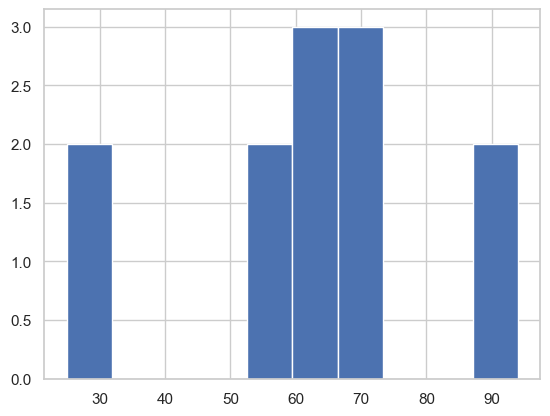

In [ ]:
df['postTestScore'].hist() # 직접 bin을 나누기 전 히스토그램을 그려서 확인하는 것도 좋다

In [ ]:
bins = [0, 25, 50, 75, 100] # 0~25, 25~50, 50~75, 57~100 까지 네 구간으로 구분한다
groups_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels = groups_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): ['Low' < 'Okay' < 'Good' < 'Great']

In [ ]:
df['categories'] = categories # 새로운 열로 할당
df

,regiment,company,name,preTestScore,postTestScore,categories
0,Nighthawks,1st,Miller,4,25,Low
1,Nighthawks,1st,Jacobson,24,94,Great
2,Nighthawks,2nd,Ali,31,57,Good
3,Nighthawks,2nd,Milner,2,62,Good
4,Dragoons,1st,Cooze,3,70,Good
5,Dragoons,1st,Jacon,4,25,Low
6,Dragoons,2nd,Ryaner,24,94,Great
7,Dragoons,2nd,Ryaner,31,57,Good
8,Scouts,1st,Sloan,2,62,Good
9,Scouts,1st,Piger,3,70,Good


In [ ]:
pd.get_dummies(df)

,preTestScore,postTestScore,regiment_Dragoons,regiment_Nighthawks,regiment_Scouts,company_1st,company_2nd,name_Ali,name_Cooze,name_Jacobson,...,name_Miller,name_Milner,name_Piger,name_Riani,name_Ryaner,name_Sloan,categories_Low,categories_Okay,categories_Good,categories_Great
0,4,25,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,24,94,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,31,57,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,62,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,70,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,24,94,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7,31,57,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,2,62,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,3,70,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Label encoding by sklearn
- scikit-learn의 preprocessing 패키지도 label/one-hot 지원
  - label encoding : 문자로 되어있는 것을 숫자로 라벨링 시켜주는 것!
- fit과 transform의 과정이 나눠진 이유
  - 새로운 데이터 입력시, 기존 labeling 규칙을 그대로 적용할 필요가 있다
    - Fit은 규칙을 생성하는 과정
    - Transform은 규칙을 적용하는 과정
  - fit을 통해 규칙이 생성된 Labelencoder을 따로 저장하고, 새로운 데이터를 입력할 경우 encoder을 사용하여 분류
  - encoder들을 실제 시스템에 사용할 경우, 규칙이 추가될 수 있기 때문에 미리 NaN값을 추가해놓는 경우가 있다!

In [ ]:
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data = raw_example.copy()

In [ ]:
data[:, 0] # 전체 데이터 중 첫번째 열만 가져옴

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [ ]:
le.fit(data[:, 0]) # 기준을 먼저 만들어줌

LabelEncoder()

In [ ]:
le.classes_ # 몇 개의 기준이 있는지
# 라벨당 인코딩된 값을 주어짐 (인덱스가 주어진다는 것)

array(['Dragoons', 'Nighthawks', 'Scouts'], dtype=object)

In [ ]:
data[:, 0] = le.transform(raw_example[:,0]) # 새로운 데이터가 들어왔을 경우, 해당 기준에 맞추어 출력
data[:3] # 해당 기준에 맞게 변한 것을 볼 수 있음

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [ ]:
label_column = [0, 1, 2, 5] # category value (라벨링을 진행할 컬럼 인덱스 값)
label_encoder_list = []

for column_index in label_column:
  le = preprocessing.LabelEncoder()
  le.fit(raw_example[:, column_index]) # 카테고리별 컬럼을 가져와 le에 새로운 기준을 만듦
  data[:, column_index] = le.transform(raw_example[:, column_index]) # data에 저장
  label_encoder_list.append(le) # 리스트에 추가 후, 삭제
  del le

data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

In [87]:
print(label_encoder_list[3].classes_)
print(label_encoder_list[0].classes_) # 각 le들의 기준들 확인 가능

['Good' 'Great' 'Low']
['Dragoons' 'Nighthawks' 'Scouts']


In [88]:
# 라벨링 인코더와 같이 원핫 인코더도 존재!
one_hot_enc = preprocessing.OneHotEncoder()
data[:, 0].reshape(-1, 1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [90]:
one_hot_enc.fit(data[:, 0].reshape(-1, 1)) # 첫번째 열로 규칙 생성

OneHotEncoder()

In [93]:
one_hot_enc.categories_ # 0, 1, 2로 구성된 카테고리들

[array([0, 1, 2], dtype=object)]

In [95]:
onehotlabels = one_hot_enc.transform(data[:, 0].reshape(-1, 1)).toarray()
onehotlabels # 원핫인코딩 규칙 적용하여 변경
# 사이킷런에도 get_dummies와 같은 모델이 존재한다
# 데이터가 많을 경우, get_dummies보단 사이킷런의 원핫 인코더를 사용하는 것이 더 편리하다

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

### 실제 타이타닉 데이터에 원핫인코딩 적용

In [53]:
# 데이터 정보 저장하는 것과 같이 리스트로 만들어놓는 것이 좋다!
object_columns = [
  "PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = [
  "Age", "SibSp", "Parch", "Fare"]

In [108]:
df.dtypes # 실제 Object 컬럼과 numeric 컬럼이 다룸

PassengerId     object
Survived       float64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [109]:
# 컬럼 타입에 맞게 타입 변환
for col_name in object_columns:
  df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
  df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   object 
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 122.8+ KB


타입을 변환하고 난 이후, 데이터 정리 노트에 적어놓는 것이 중요!

In [10]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
  if index is True:
    # index=True일 경우, 해당 두 개의 인덱스 값을 기준으로 merge를 진행하게 됨
    return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
  else:
    return pd.merge(ldf, rdf, how=how, on=on)

In [112]:
df["Embarked"].mode() # 최빈값

0    S
Name: Embarked, dtype: object

In [120]:
df[df["Embarked"].isnull() == True]

# 최빈값으로 빈 셀 채우기
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

In [121]:
pd.get_dummies(df["Sex"], prefix="Sex")

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


In [47]:
# get_dummies에 prefix를 줄 경우, 해당 Prefix를 붙여 생성해줌
one_hot_df = merge_and_get(
  df, pd.get_dummies(df["Sex"], prefix="Sex"), on = None, index=True)
one_hot_df = merge_and_get(
  one_hot_df, pd.get_dummies(df["Pclass"], prefix="Pclass"), on = None, index=True)
one_hot_df = merge_and_get(
  one_hot_df, pd.get_dummies(df["Embarked"], prefix="Embarked"), on = None, index=True)

In [48]:
one_hot_df # 원핫인코딩을 적용한 one_hot_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,0,0,1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,1,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,0,0,1
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0,0,1,0,0,1


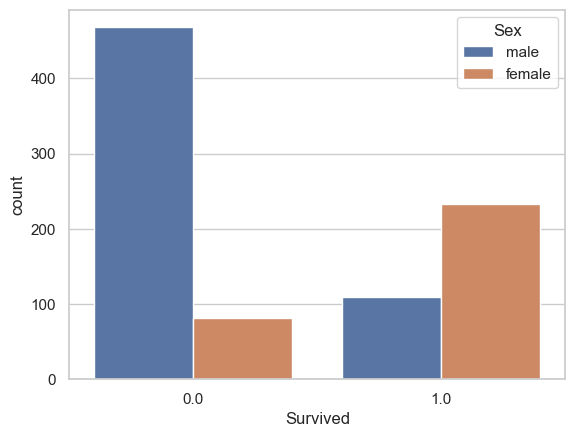

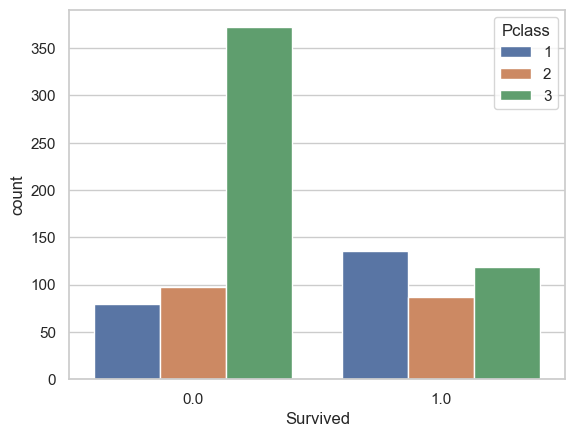

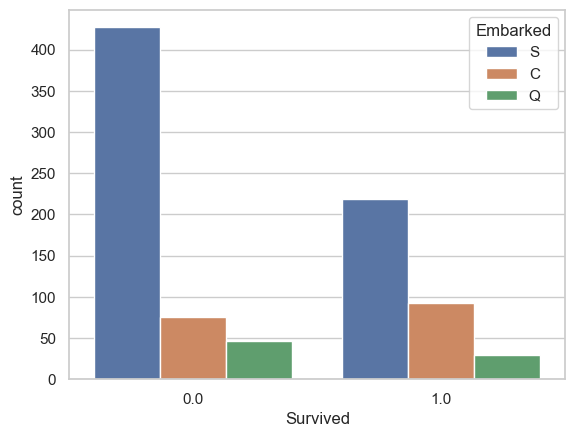

In [124]:
temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
  temp_df = pd.merge(one_hot_df[col_name], y_true, left_index = True, right_index = True)
  # Survived를 기준으로 열들을 countplot으로 그려넣음
  sns.countplot(x="Survived", hue=col_name, data=temp_df)
  plt.show()

Embarked 그래프를 살펴 보았을 때, S가 높은 것을 볼 수 있음

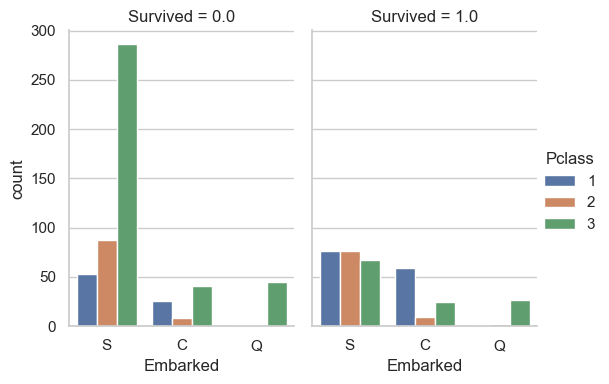

In [126]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)

# 새 가지 (Embarked, Pclass, Survived) 관점에서 category plot 작성
g=sns.catplot(x="Embarked", hue="Pclass", col="Survived",
              data=temp_df, kind="count",
              height=4, aspect=.7)

Embarked의 S가 3등석이 많은 것을 볼 수 있음 !
  - 해당 이유는?
=> 이런식으로 EDA를 사용하여 데이터에 대해 알아볼 수 있음

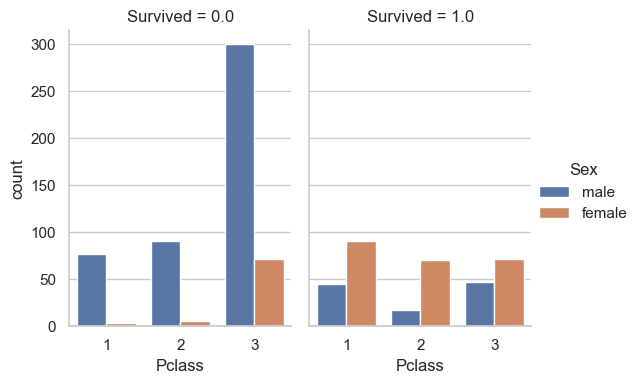

In [127]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)

# 새 가지 (Sex, Pclass, Survived) 관점에서 category plot 작성
g=sns.catplot(x="Pclass", hue="Sex", col="Survived",
              data=temp_df, kind="count",
              height=4, aspect=.7)

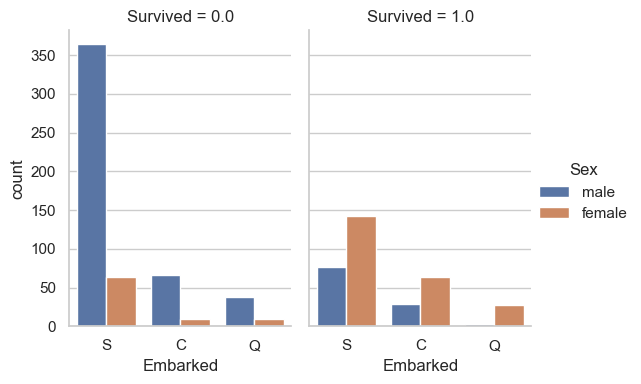

In [128]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)

# 새 가지 (Sex, Pclass, Survived) 관점에서 category plot 작성
g=sns.catplot(x="Embarked", hue="Sex", col="Survived",
              data=temp_df, kind="count",
              height=4, aspect=.7)

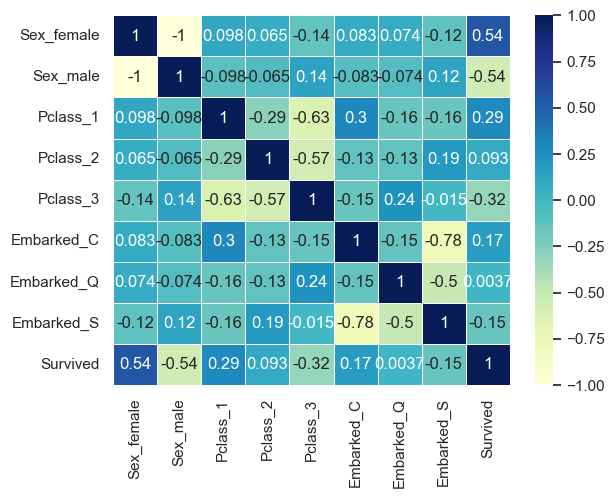

In [132]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in temp_columns and "_" in col_name]

# one_hot_df.columns.tolist() : 모든 col name
# col_name.split("_") : 원핫인코딩시 _으로 묶기 때문에 해당 뒷 부분을 잘라내는 것
# temp_columns : ['Sex', 'Pclass', 'Embarked']
# crosscheck_columns : 만약 temp_columns 안에 컬럼명이 존재하고, col_name안에 _가 존재하는 열들

# temp_columns
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

# Feature Scaling

두 변수 중 하나의 값의 크기가 너무 크다!
- 몸무게와 키가 변수일 때, 상대적으로 수치가 큰 키가 영향을 더 줄 수 있다
- Feature간의 최대-최소값의 차이를 맞춘다

Feature scaling 전략
- Min-max Normalization
  - 기존 변수에 범위를 새로운 최대-최소로 변경
  - 일반적으로 0과 1 사이 값으로 변경

- Standardization (Z-score Normalization)
  - 기존 변수에 범위를 정규 분포로 변환
  - 실제 Min-Max의 값을 모를 때 활용 가능

주의 사항
- 실제 사용할 때는 반드시 정규화 Parameter (최대/최소, 평균/표준편차) 등을 기억하여 새로운 값에 적용해야 한다
  - 실제 최대 최소값이 변경될 수 있다

In [145]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
  'A' : [14.00, 90.20, 90.95, 96.27, 91.21],
  'B':[103.02, 107.26, 110.35, 114.23, 114.68],
  "C": ['big', 'small', 'big', 'small', 'small']
})

In [148]:
# 데이터 프레임에 적용
data = df["A"]

# 브로드캐스팅이 일어나 알아서 연산 적용이 된다
new_max = 5 # 새로운 최대값 5점
new_low = 1 # 최소값 1점

df["A"] = (data - data.min()) / (data.max() - data.min()) * (new_max - new_low) + new_low
df

,A,B,C
0,1.000000,103.02,big
1,4.704874,107.26,small
2,4.741339,110.35,big
3,5.000000,114.23,small
4,4.753981,114.68,small


In [149]:
data = df["B"]
df["B"] = (data - data.mean())/(data.std())
df

,A,B,C
0,1.000000,-1.405250,big
1,4.704874,-0.540230,small
2,4.741339,0.090174,big
3,5.000000,0.881749,small
4,4.753981,0.973556,small


In [152]:
def feature_scaling(df, scaling_strategy = "min-max", columns = None):
  if columns == None:
    columns = [col_name for col_name in df.columns]
  for col_name in columns:
    if scaling_strategy == "min-max":
      df[col_name] = (df[col_name] - df[col_name].min()) / (df[col_name].max() - df[col_name].min())
    elif scaling_strategy == "z-score":
      df[col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].std())
  return df

In [153]:
df = pd.DataFrame({
  'A' : [14.00, 90.20, 90.95, 96.27, 91.21],
  'B':[103.02, 107.26, 110.35, 114.23, 114.68],
  "C": ['big', 'small', 'big', 'small', 'small']
})

feature_scaling(df, columns = ["A", "B"])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


Feature scaling with sklearn
- Label encoder과 마찬가지로, sklearn도 feature scale 지원
- MinMaxScaler와 StandardScaler 사용

In [154]:
from sklearn import preprocessing

df = pd.io.parsers.read_csv("https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv",
                            header=None,
                            usecols=[0, 1, 2]
                            )

df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [164]:
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])

In [165]:
print(std_scaler.mean_)
print(std_scaler.scale_)

[13.00061798  2.33634831]
[0.80954291 1.11400363]


In [166]:
df_std =std_scaler.transform(df[['Alcohol', 'Malic acid']])
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [163]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax =minmax_scaler.transform(df[['Alcohol', 'Malic acid']])
df_minmax

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

스케일링을 한다하더라도 분포에는 큰 변화가 없음!
- 이후, 딥러닝 때 사용하게 될 것임

# Feature Engineering
- 가장 적합한 특성을 찾는 것

Generation
- 새로운 특성을 만드는 것
- Binarization (원핫인코딩), Quantization (라벨링)
- Scaling (normalization)
- Interaction features (두 개의 feature간의 비교)
- Log transformation

## Log transformations
- 데이터의 분포가 극단적으로 모였을 때 (poisson)과 같은 경우 사용
- 선형 모델은 데이터가 정규분포 때 적합하다
  - Poisson을 Normal distribution으로 변환
- 로그인 카운트, 제품 판매량, 검색 단어 등
- np.log or np.exp 등의 함수 사용

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [169]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'Value')

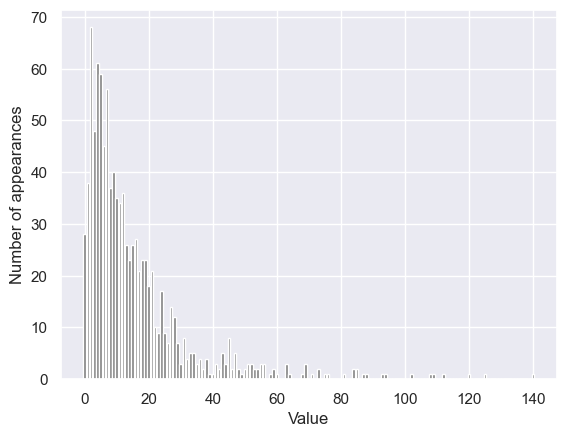

In [172]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color="grey")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

# 한 쪽으로 몰린 데이터 분포 형성

In [173]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

# 해당 분포를 그대로 넣어줄 경우, R^2가 0.622가 나옴

Test score: 0.622


In [174]:
# log transformation
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

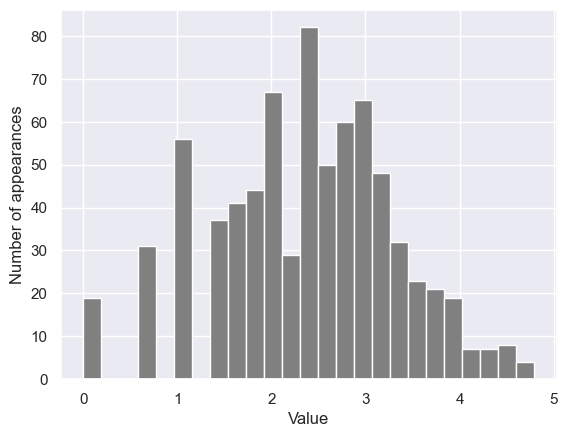

In [176]:
plt.hist(X_train_log[:, 0], bins=25, color="grey")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

# 정규분포의 모습으로 변한 것을 볼 수 있다

In [179]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

# 높은 성능을 보임!

Test score: 0.875


## Mean encoding
- category 데이터는 항상 one-hot encoding만 사용하는 것은 아니다
- 대표적인 방법으로 Y값에 대한 분포를 활용한 Mean Encoding이 사용된다
- Label 인코딩은 그 자체로 정보가 존재하지 않다
- Mean 인코딩은 분포의 값을 반영 가능!
  - 분포의 값을 취해 원핫인코딩과 같이 넣어주는 것
  - 상관관계에 대한 값을 인코딩하는 것
  - groupby한 값을 채워주는 것과 비슷함
  - 조금 더 빨리, 조금 더 나은 성능이 나오기도 함

- Regression Task는 단순 평균값으로 입력
- overfitting을 제거하기 위해 SMoothing을 사용하기도 함
  - 일반 평균값 라벨에 a값을 더해주는 것? 

In [12]:
temp_df = pd.merge(
  one_hot_df["Pclass"], y_true, left_index = True, right_index = True)
temp_df.groupby("Pclass")["Survived"].mean() # Survived를 기준으로 Pclass을 그룹화해서 평균

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [13]:
temp_df["Pclass"].replace(
  temp_df.groupby("Pclass")["Survived"].mean()
) # 해당 평균 값으로 Replace 시켜준다

0      0.242363
1      0.629630
2      0.242363
3      0.629630
4      0.242363
         ...   
886    0.472826
887    0.629630
888    0.242363
889    0.629630
890    0.242363
Name: Pclass, Length: 891, dtype: float64

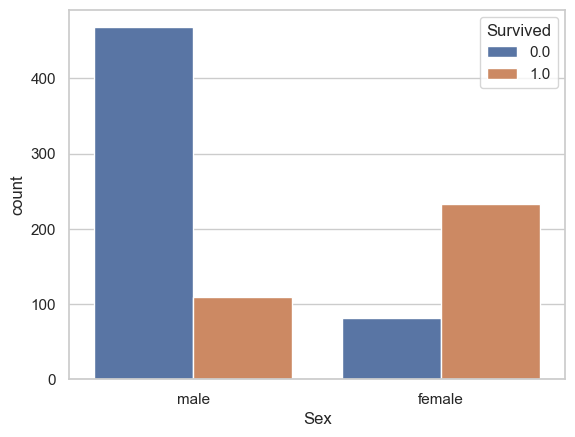

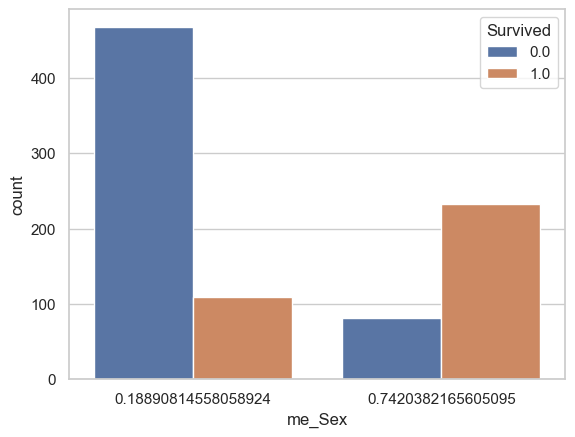

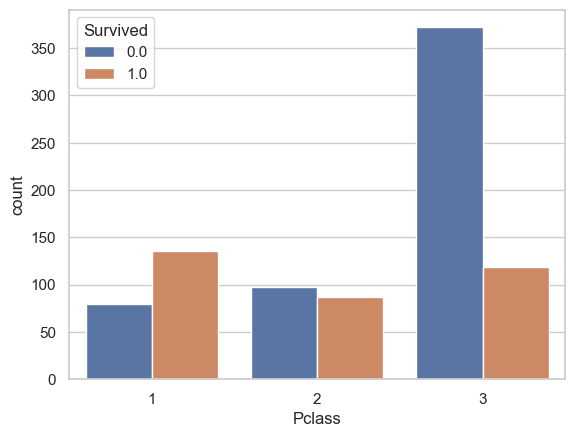

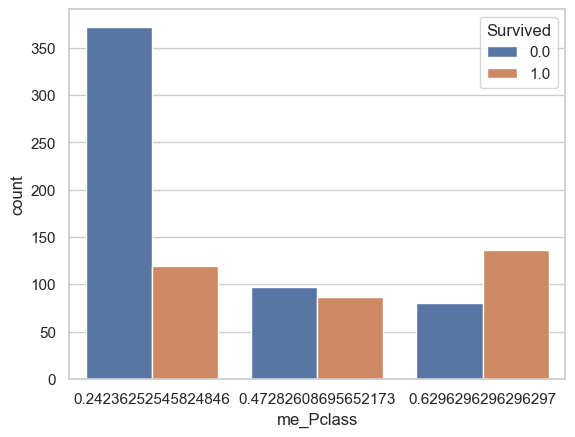

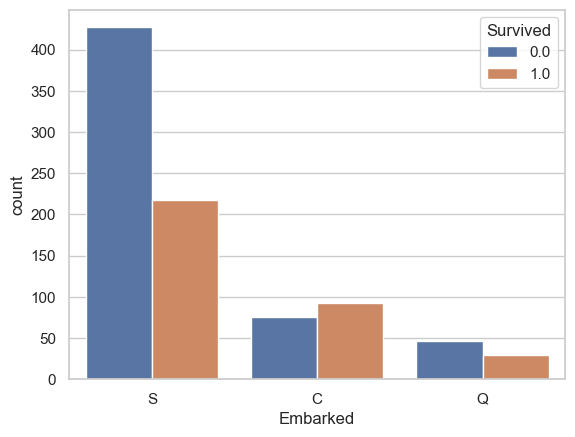

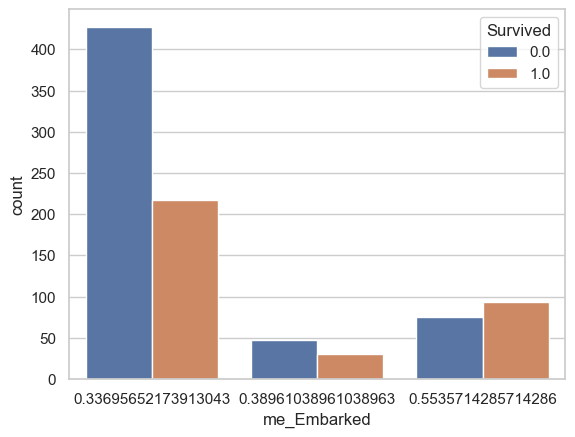

In [14]:
temp_columns = ["Sex", "Pclass", "Embarked"]

me_list = []
for col_name in temp_columns:
  temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
  temp_df["me_" + col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)["Survived"].mean())

  # mean encoding을 한 값과 일반 값에 대하 차이를 그래프로 살펴봄
  sns.countplot(x = col_name, hue = "Survived", data = temp_df)
  plt.show()
  sns.countplot(x = "me_" + col_name, hue = "Survived", data = temp_df)
  plt.show()

In [19]:
temp_columns = ["Sex", "Pclass", "Embarked"]

me_list = []
for col_name in temp_columns:
  temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
  temp_df["me_" + col_name] = temp_df[col_name].replace(temp_df.groupby(col_name)["Survived"].mean())

  me_list.append(temp_df.drop("Survived", axis = 1))
  # me_list : mean 인코딩 열 값을 가지고 있는 리스트

In [23]:
temp_df = pd.merge(
          pd.concat(me_list, axis = 1)[["me_" + col_name for col_name in temp_columns]],
          y_true, left_index=True, right_index=True
          )
temp_df
# temp_df : me_list 안 열들과 Survived를 합쳐 데이터프레임 생성

,me_Sex,me_Pclass,me_Embarked,Survived
0,0.188908,0.242363,0.336957,0.0
1,0.742038,0.629630,0.553571,1.0
2,0.742038,0.242363,0.336957,1.0
3,0.742038,0.629630,0.336957,1.0
4,0.188908,0.242363,0.336957,0.0
...,...,...,...,...
886,0.188908,0.472826,0.336957,0.0
887,0.742038,0.629630,0.336957,1.0
888,0.742038,0.242363,0.336957,0.0
889,0.188908,0.629630,0.553571,1.0


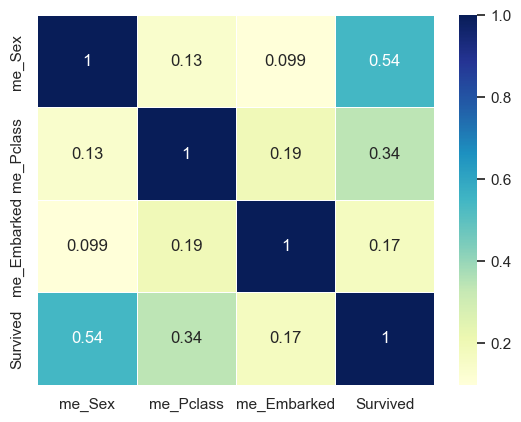

In [24]:
corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot = True, linewidths = .5, cmap = "YlGnBu")
# corr 관계가 더 높아진 것을 볼 수 있다

이외에도 많은 Encoding 기법들이 존재한다

## Interaction features 
- 기존 Feature들의 조합으로 새로운 feature를 생성
  - 마당의 가로, 세로보다는 두 열의 곱으로 마당의 넓이라는 새로운 열을 만들어주는 것이 더 좋다
- Data에 대한 사전 지식과 이해가 필요
- Polynomial feature를 사용한 자동화 가능
- 실험적으로 접근할 요소들은 있음
- weight + time-period, sensor1 + sensor2

In [49]:
temp_columns = ["Sex", "Pclass", "Embarked"]
one_hot_df["Sex-Pclass"] = df["Sex"].map(str) + df["Pclass"].map(str)
one_hot_df["Embarked-Pclass"] = df["Embarked"].map(str) + df["Pclass"].map(str)
one_hot_df["Sex-Pclass"], one_hot_df["Embarked-Pclass"] # 해당 두 개의 열을 str으로 변환하여 합친 것을 새로운 열로 생성한다

(0         male3
 1       female1
 2       female3
 3       female1
 4         male3
          ...   
 1304      male3
 1305    female1
 1306      male3
 1307      male3
 1308      male3
 Name: Sex-Pclass, Length: 1309, dtype: object,
 0       S3
 1       C1
 2       S3
 3       S1
 4       S3
         ..
 1304    S3
 1305    C1
 1306    S3
 1307    S3
 1308    C3
 Name: Embarked-Pclass, Length: 1309, dtype: object)

In [50]:
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Sex-Pclass"], prefix = "SexPclass"), on = None, index=True)
one_hot_df = merge_and_get(one_hot_df, pd.get_dummies(one_hot_df["Embarked-Pclass"], prefix = "EmbarkedPclass"), on = None, index=True)
one_hot_df # 기존 데이터프레임과 병합

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,EmbarkedPclass_C1,EmbarkedPclass_C2,EmbarkedPclass_C3,EmbarkedPclass_Q1,EmbarkedPclass_Q2,EmbarkedPclass_Q3,EmbarkedPclass_S1,EmbarkedPclass_S2,EmbarkedPclass_S3,EmbarkedPclass_nan1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,0,0,0,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0


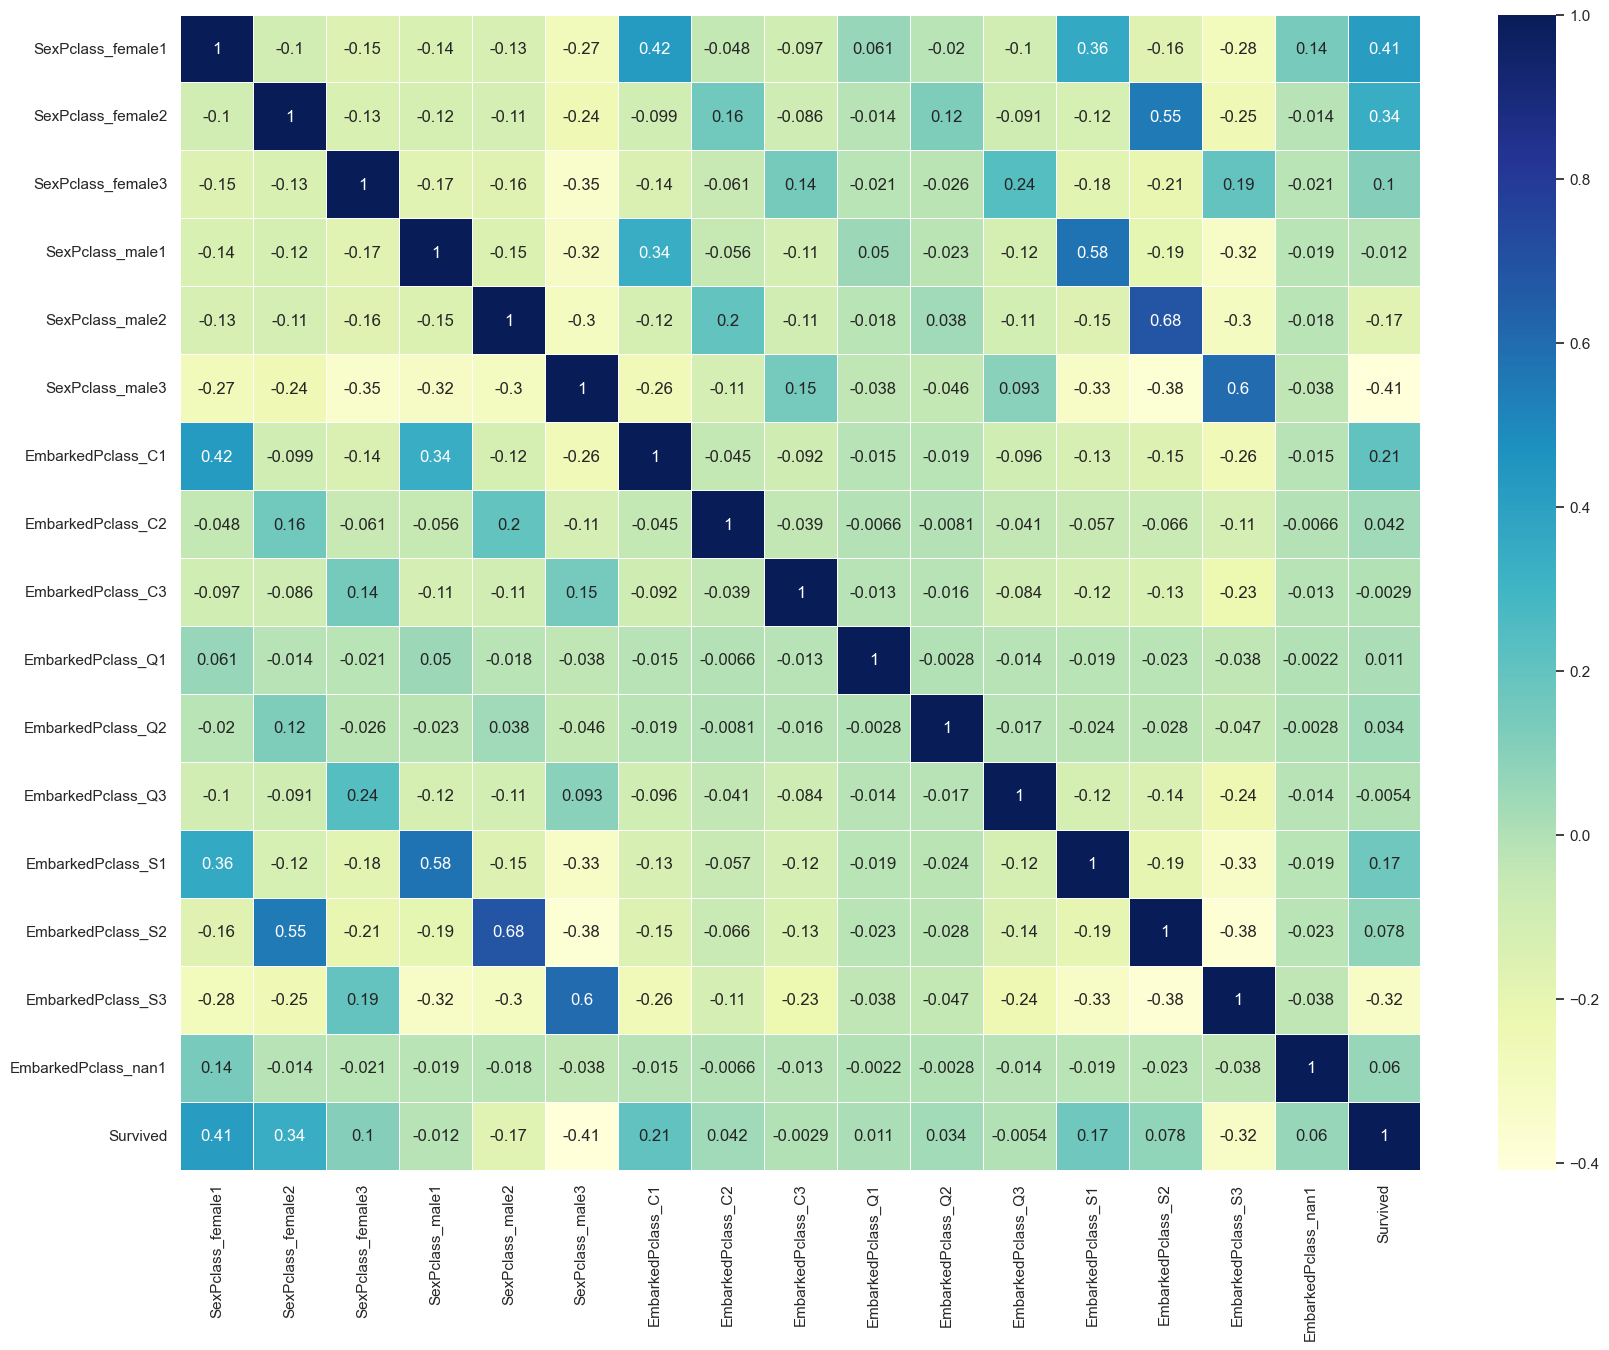

In [51]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                      if col_name.split("_")[0] in ["SexPclass", "EmbarkedPclass"] and "_" in col_name]

# col_name.split("_")[0] : 열 이름 중 _으로 분리했을 때, SexPclass 혹은 EmbarkedPclass가 붙어있으면서, _가 col_name에 존재하는 경우
# crosscheck_columns : interaction feature로 추가한 열을 찾아 리스트로 저장

temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True)

corr = temp_df.corr()
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

Etc
- Feature끼리 더하기, 곱하기, 나누기 등등
- 왜 잘 되는지 모르지만, 잘 되는 경우가 있다
- 도메인 지식과 EDA로 좋은 Feature들을 생성!

# Feature Engineering 3

### Numeric data types

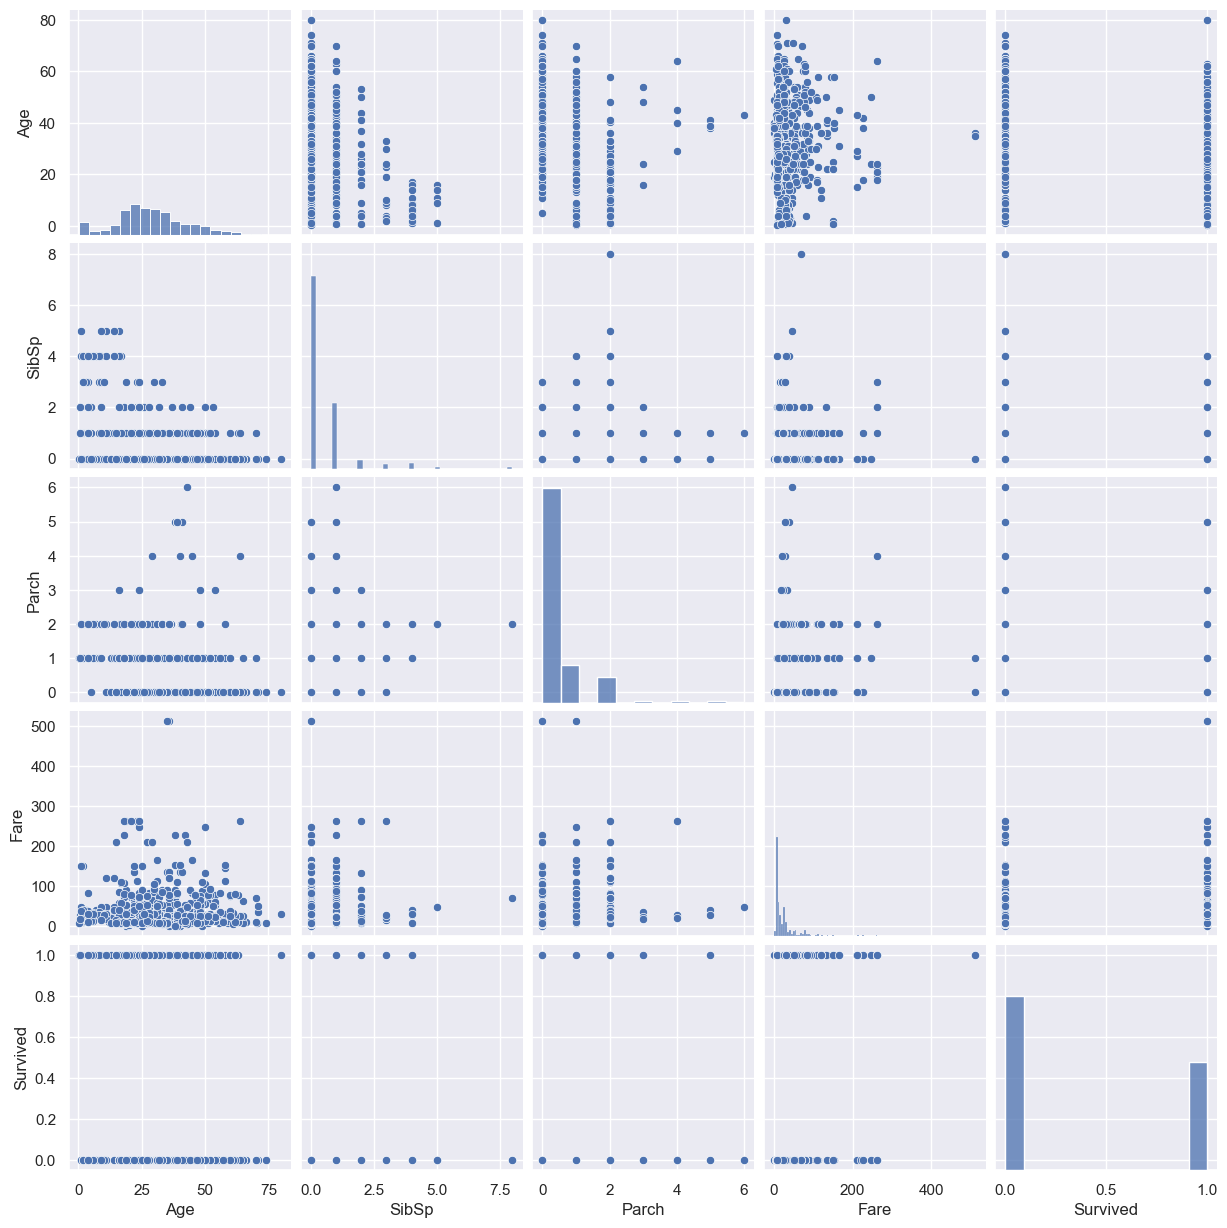

In [54]:
temp_df = pd.merge(one_hot_df[numeric_columns], y_true, left_index=True, right_index=True)

# 전체값들 보기!
sns.pairplot(temp_df)

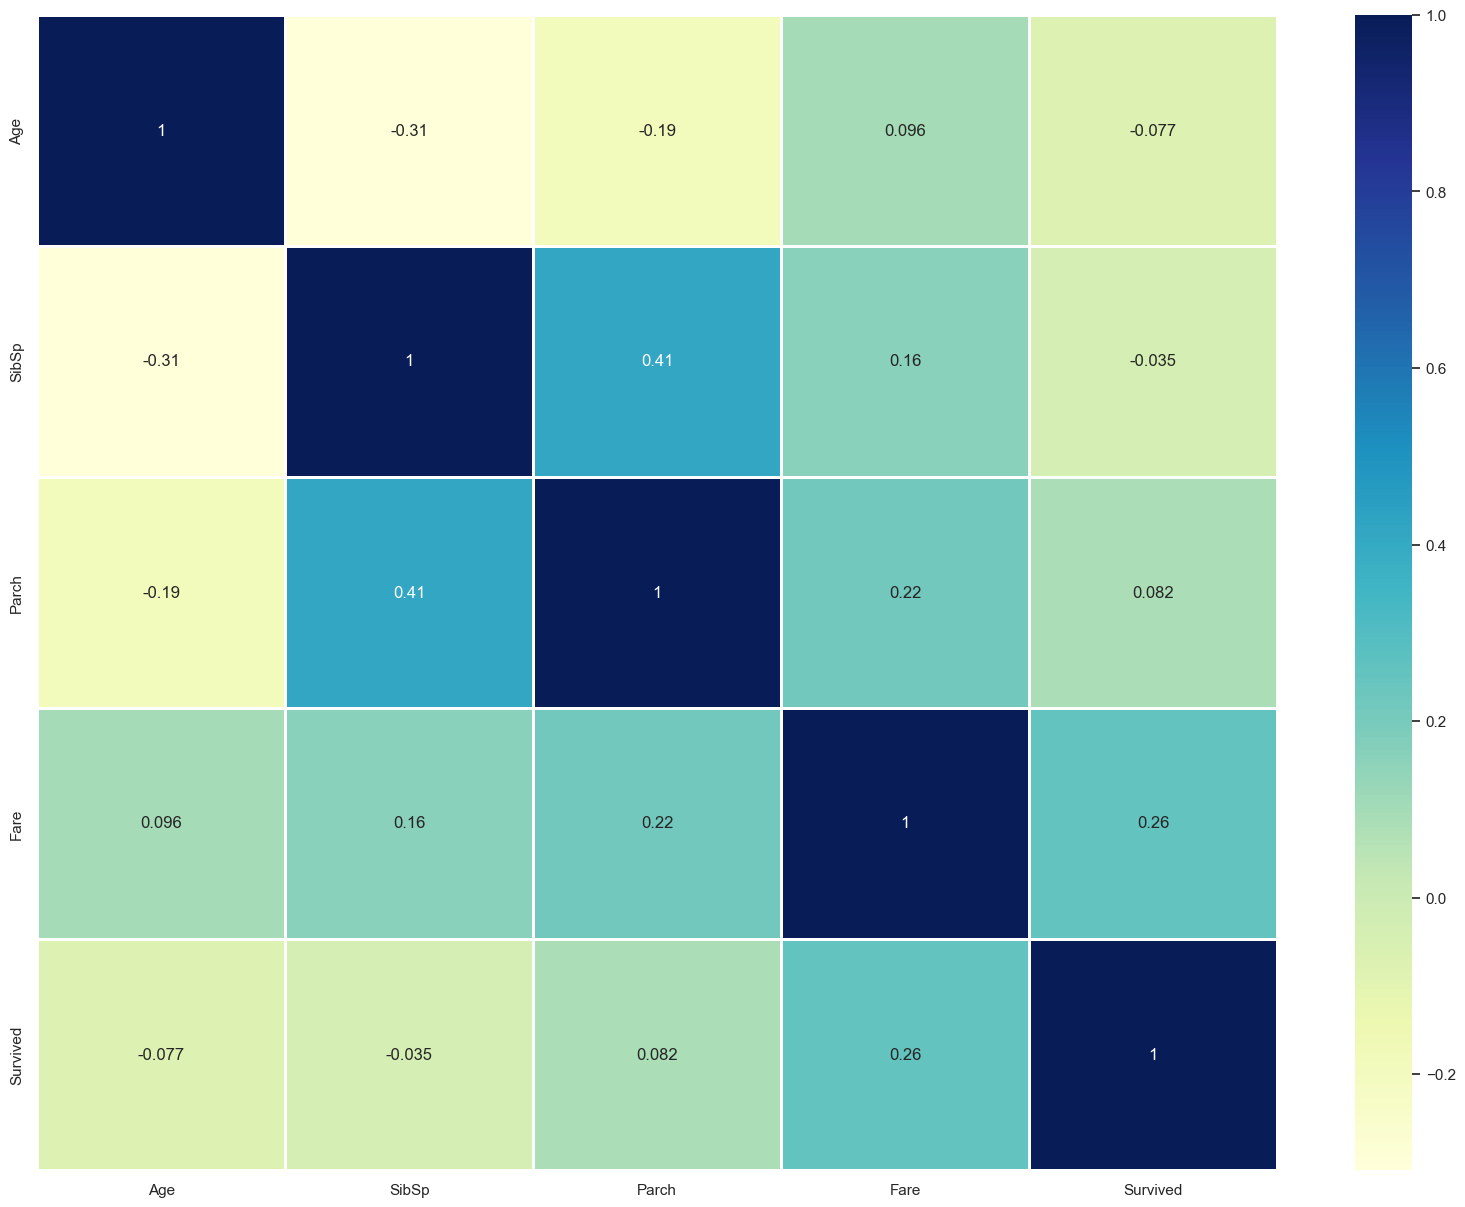

In [55]:
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr, annot = True, linewidths=.8, cmap="YlGnBu")
# 각 값들에 대해 interaction을 살펴보는 방법

각 바플롯을 만들어서 확안!

/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_85079/3722900823.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x = "SibSp", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize=.2)


<AxesSubplot: xlabel='SibSp', ylabel='Fare'>

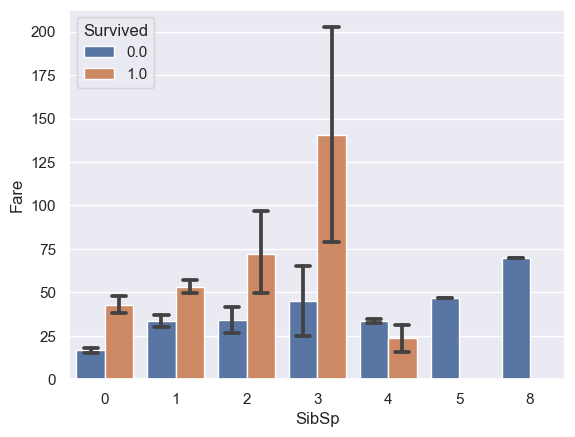

In [56]:
# 각 요금별로 사람 죽음이 차이가 존재하는지
# 요금이 크면 클수록, 형제자매가 많은 것을 볼 수 있다 -> 형제가 많으면 돈을 지불 많이 한다
sns.barplot(x = "SibSp", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize=.2)

/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_85079/3656061187.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x = "Parch", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize=.2)


<AxesSubplot: xlabel='Parch', ylabel='Fare'>

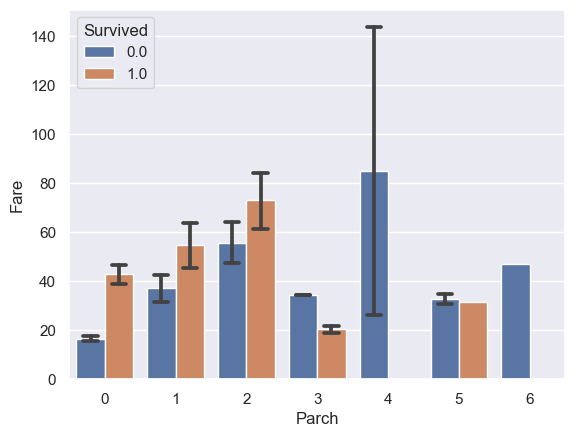

In [57]:
sns.barplot(x = "Parch", y = "Fare", hue = "Survived", data = temp_df, ci = 68, capsize=.2)

/var/folders/yr/33_dxfw93nzc66j2xmmvkxnw0000gn/T/ipykernel_85079/3457788355.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(x = "SibSp", y = "Age", hue = "Survived", data = temp_df, ci = 68, capsize=.2)
/Users/lee/opt/anaconda3/envs/workspace/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/lee/opt/anaconda3/envs/workspace/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot: xlabel='SibSp', ylabel='Age'>

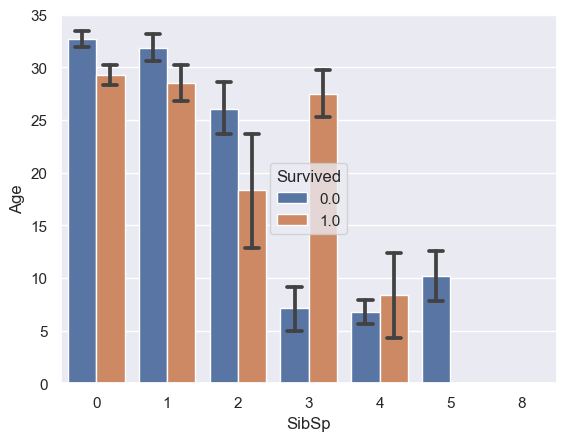

In [58]:
# 나이와 형제자매
sns.barplot(x = "SibSp", y = "Age", hue = "Survived", data = temp_df, ci = 68, capsize=.2)

### Bining

In [59]:
one_hot_df["Fare"].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64

<AxesSubplot: >

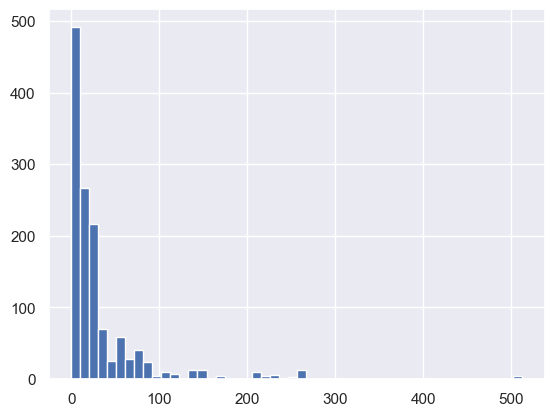

In [60]:
one_hot_df["Fare"].hist(bins = 50)

### Log Transform

NameError: name 'bin_one_hot_df' is not defined

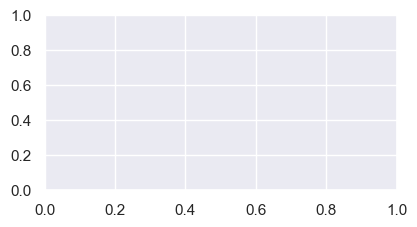

In [61]:
fig = plt.figure()
fig.set_size_inches(10,5)

ax = []
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, col_name in enumerate(numeric_columns):
  ax.append(fig.add_subplot(2, 2, i+1)) # 두개의 플랏 생성
  X_1 = bin_one_hot_df[col_name] # np.log10을 씌우고 +a를 더할 경우, 정규분포와 비슷하게 변환하는 것을 볼 수 있음

  ax[i] = sns.distplot(X_1, bins = 10)
  ax[i].set_title(col_name)

In [ ]:
log_bin_one_hot_df = merge_and_get(
  bin_one_hot_df, np.log10(bin_one_hot_df["Fare"] + 0.5), on = None, index=True) # 기존 데이터프레임과 병합하여

log_bin_one_hot_df.rename(columns = {'Fare_x':'Fare', 'Fare_y':'log_fare'}, inplace=True)

violinplot 또한, 데이터 분포와 여러가지 관점에서 볼 수 있다!
- 분포를 좀 더 자세히 보고 싶다면, swarmplot!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 3) # 3개 이상의 feature들을 섞어서 interaction features를 만들어주는 것!
X_poly = pd.DataFrame(poly_features.fit_transform(log_bin_one_hot_df[numeric_columns]))

이후, corr을 출력해보면서 확인해볼 수 있다
- 좋은 정보를 얻을 수 없을 수 있지만, y값과 색상이 진할수록 영향을 많이 주는 것일 수 있다
- 해당 열들이 왜 영향을 많이 주는지 따져보는 것이 좋다

### String handling

In [ ]:
from collections import Counter
Counter((log_bin_one_hot_df["Name"].str.lower() + ' ').sum().split()).most_common(3)
# [('mr', 757),('mriss', 200), ... ] 이러한 정보도 뽑아낼 수 있다

In [63]:
one_hot_df["Ticket"].str.rsplit(expand=True,) # 티켓을 나누어 특별한 의미가 있는지 확인

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
1304,A.5.,3236,None
1305,PC,17758,None
1306,SOTON/O.Q.,3101262,None
1307,359309,None,None


In [66]:
one_hot_df["Ticket"].str.extractall('(\d+)') # 숫자 정보만 뽑아왔을 때

0
     match         
0    0            5
     1        21171
1    0        17599
2    0            2
     1      3101282
...             ...
1304 1         3236
1305 0        17758
1306 0      3101262
1307 0       359309
1308 0         2668

[1373 rows x 1 columns]

feature가 늘어날수록 성능이 낮아지지만, 일단 feature를 늘린 후 제거!

중복되는 열일 수 있지만, 관계가 있는 열을 찾을 수 있다는 점에 집중!

# Feature Selection
- 가장 적합한 특성을 선택하는 방법
- Univatiate statics # 통계적 수치
- Model-based selection # 다른 모델을 사용
- Iterative feature
- Feature removal # 아예 지워버림


- 모든 feature들이 반드시 model 학습에 필요치 않다
- 어떤 feature들은 성능을 오히려 나쁘게 한다
  - 너무 많은 features -> overfitting의 원인
- 모델에 따라서 필요한 feature를 선택함
- 필요없는 feature 제거 -> 학습 속도와 성능 향상
- 다양한 기법과 코드에 대해 공부

feature 선택의 주의사항들
- prediction time에도 쓸 수 있는 feature인가?
  - 실제로 예측하는 시점에도 사용 가능한가
- 실시간 예측이 필요할 대, 생성이 너무 고비용 아닌가
  - 원하는 속도만큼 나오는지, 크기가 너무 크지 않은지
- scale은 일정한가? 또는 비율적으로 표현 가능한가?
- 새롭게 등장하는 category data는? 가장 비슷한 것?
- 너무 극단적인 분포 -> threshold 기반으로 binarziation

이런 feature들은 삭제하자!
- correlation이 너무 높은 feature는 삭제
  - y와의 cor이 아닌, 열끼리의 cor이 높은 경우 모델이 헷갈릴 수 있음
- 전처리가 완료된 str feature들
- ID와 같은 성향을 가진 feature들

### 데이터 정리가 끝나면 학습하는 방법
- 적합한 모델을 선정한다 (실험)
  - RFD, XD Lizht, AutoML
- 모델에 적합한 하이퍼 파라메터를 선정한다 (실험)
- 다양한 전처리 경우의 수를 입력한다 (실험)
- 학습을 실행한다
- 성능을 평가한다
  - Acc, Precision, PMSE

In [67]:
features = one_hot_df.columns.tolist()
features

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_female',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex-Pclass',
 'Embarked-Pclass',
 'SexPclass_female1',
 'SexPclass_female2',
 'SexPclass_female3',
 'SexPclass_male1',
 'SexPclass_male2',
 'SexPclass_male3',
 'EmbarkedPclass_C1',
 'EmbarkedPclass_C2',
 'EmbarkedPclass_C3',
 'EmbarkedPclass_Q1',
 'EmbarkedPclass_Q2',
 'EmbarkedPclass_Q3',
 'EmbarkedPclass_S1',
 'EmbarkedPclass_S2',
 'EmbarkedPclass_S3',
 'EmbarkedPclass_nan1']

In [68]:
all_df = one_hot_df.copy(deep=True)

# 앞서 말한 경우의 전처리가 완료된 feature, Id값 등은 드랍
elimination_features = ['PassengerId', 'Name', 'Cabin', 'Ticket']
for col_name in elimination_features:
  all_df.drop(col_name, axis=1, inplace=True)

In [69]:
X_train = all_df[:number_of_train_dataset].values
X_test = all_df[number_of_train_dataset:].values
y_train = y_true.copy()

In [71]:
from sklearn.feature_selection import RFE # RFE : 다른 모델을 사용해서 필요없는 feature들을 알아서 제거해준다
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel # 통계학을 사용하여 모델 없애주는 것

select = RFE(RandomForestClassifier(n_estimators=100))
# select = SelectFromModel(estimator=RandomForestClassifier(n_estimators=200), threshold=)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
X_train_selected.shape

ValueError: could not convert string to float: 'male'

In [ ]:
select.get_support() # feature 중 산 feature와 죽은 feature를 알아낼 수 있다 
# all_df.columns[select.get_support()] : 살아남은 feature 확인 가능

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 만들기
clf = RandomForestClassifier(
  n_estimators=100, max_depth=20, random_state=0
)
clf.fit(X_train, y_train)

In [ ]:
idx = (all[number_of_train_dataset:].index+1).tolist()
y_pre = clf.predict(X_test) # y prediction 값들
# y_pre = clf.predict(select.transform(X_test)) # 열을 제거했을 때의 예측값

In [ ]:
# 제출 코드
submission_columns = ["PassengerId", "Survived"]
submission_df = pd.DataFrame([idx, y_pre]).T
submission_df.columns = submission_columns

for col_name in submission_columns:
  submission_df[col_name] = submission_df[col_name].astype(int)
submission_df.to_csv("submission.csv", index=False)